<b>The project should meet the following guidelines:</b>

- Your project should relate to something related to machine learning. Find a dataset and a topic that you are excited to work on. Who knows, you may take it one further step in the practicum.
- Your project must include data exploration, preferably with visualization and do not be shy to add your own comments to the code and on what you notice from the visualizations
- Your project must include a solid experimental examination. For example, if you implement a classification algorithm, I would expect to see optimization of hyperparameters.
- An evaluation on the training and test data set such as accuracy, MSE, RMSE,  precision, recall .. etc for all your trials
- When possible, a brief analysis of the model learned (e.g. looking at the weights of a linear model) or importance of a PCA
- You have to include a baseline model in your trials (either linear or logistic regression) as well as its analysis
- You are encourage to use any external resources you would like including both code and data as long as you cite your resources


<b>Some possible resources and ideas</b>

- Dealing with imbalanced data
- Comparison between random forest, deep learning and baseline
- Bagging and boosting
- Transfer learning

<b>Bonus points</b>
- There will be bonus on working with large datasets … (higher than 20k samples)
- There will be bonus on making your codes run over the cloud


<font color="blue">I have selected the following dataset:
FashionMNIST: https://www.kaggle.com/zalando-research/fashionmnist

I believe this dataset will allow me to explore the exciting world of image analysis as well as multiclass classification algorithms for Machine Learning.
Also the FashionMNIST dataset has 60000 x 785 dataset for training and 10000 x 785 dataset for testing
</font>

In [1]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl


In [2]:
# this is unrelated to the project .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<b>Loading the data<b>

In [4]:
df_train_pd = pd.read_csv('fashion-mnist_train.csv')
df_test_pd = pd.read_csv('fashion-mnist_test.csv')
# df_train_pd=df_train_pd[0:2000]
# df_test_pd=df_test_pd[0:2000]
print(df_train_pd.shape)
print(df_test_pd.shape)
df_train_pd.head(1)

(60000, 785)
(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Splitting the data into features and labels.</b>

In [5]:
# Converting all columns to float for future processing
df_train = np.array(df_train_pd, dtype='float32')
df_test = np.array(df_test_pd, dtype='float32')

# Splitting training data into X and Y
X_train = df_train[:, 1:]
y_train = df_train[:, 0]

# Splitting test data into X and Y
X_test = df_test[:, 1:]
y_test = df_test[:, 0]

<b>Data Exploration<b>
    
- Display if there are null values.
- Display unique labels.
- Displaying the images to verify the labels.
- PCA of the data to identify possibility of dimensionality reduction

In [6]:
print("Null values in Train dataset:", df_train_pd.isna().sum().sum())
print("Null values in Test dataset:", df_test_pd.isna().sum().sum())

Null values in Train dataset: 0
Null values in Test dataset: 0


In [7]:
df_combined = np.concatenate((y_train,y_test))
unique_labels = np.unique(df_combined)
print("Unique labels are", unique_labels)

Unique labels are [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The labels shown correspond to the label definition from Kaggle.


Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

In [8]:
# Creating an array to map label integer to string

labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


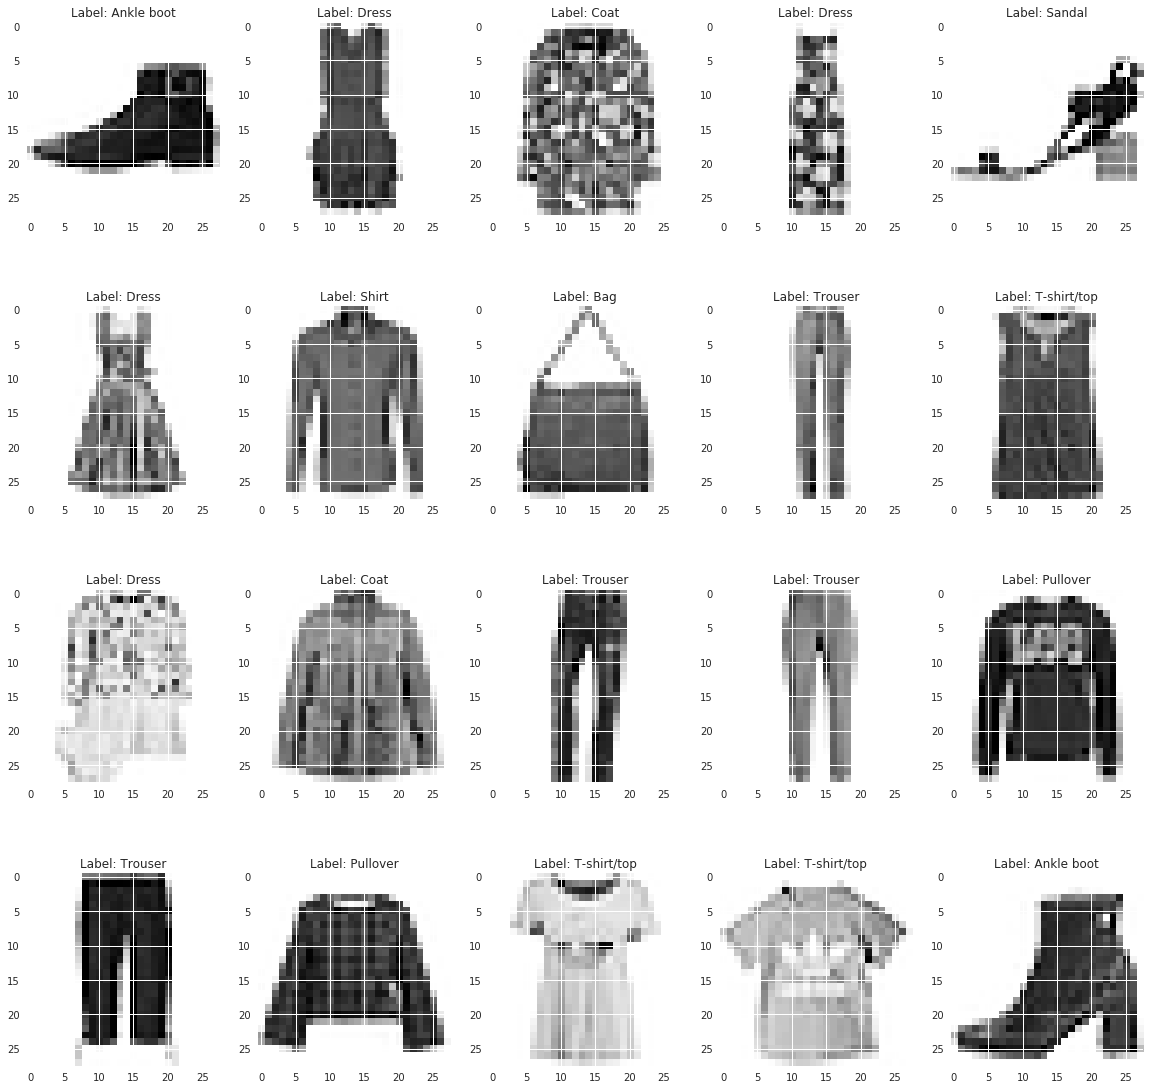

In [9]:
# Verifying if items are correctly mapped to labels by picking 20 
# random images and displaying their labels along with the image.

np.random.seed(1234)
rand_img = np.random.randint(0,np.size(X_train,0),20)
fig=plt.figure(figsize=(20, 20))
i=1
h=4
w=5
for x in rand_img:
    image = X_train[x, :].reshape((28, 28))
    ax=fig.add_subplot(h, w, i)
    ax.title.set_text("Label: " + str(labels[int(y_train[x])]))
    plt.imshow(image)
    i+=1
plt.show()

<b>PCA</b>

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


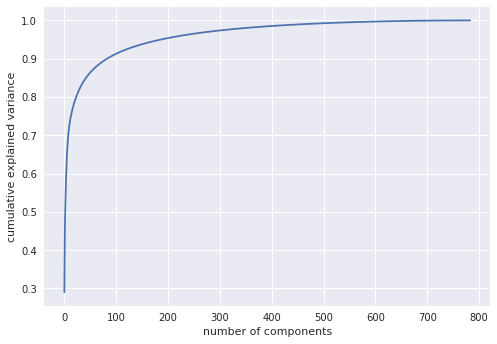

In [10]:
# Visualizing the variance of components
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0.5,0,'number of components')

Text(0,0.5,'cumulative explained variance')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


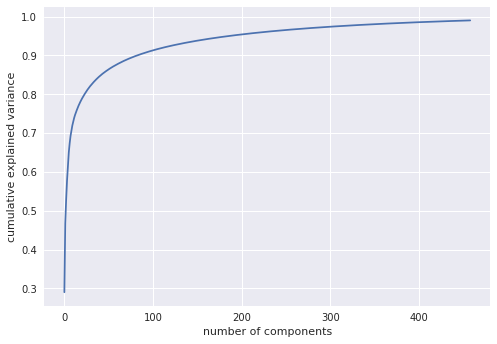

In [11]:
# Applying image compression for a reduced dataset
pca_reduced=PCA(n_components=0.99)
X_train_reduced=pca_reduced.fit_transform(X_train)
plt.plot(np.cumsum(pca_reduced.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

X_test_reduced=pca_reduced.transform(X_test)

<b>Splitting the data into 3 parts. </b>
    - Train
    - Validation
    - Test
Train and test has been provided.
    
We will split the train set into 2 more parts. One to train and one to validate. The test data will be used at the end to compare the models we develop based on the train and validate dataset.

Also we will normalize the value per pixel(28x28) to represent a value within 0 and 1.

In [12]:
# Max feature value for Train and Test data.

max_train = np.max(X_train)
max_test = np.max(X_test)
max_train_reduced = np.max(X_train_reduced)
max_test_reduced = np.max(X_test_reduced)

# Normalizing data in X_train and X_test

X_train = X_train/max_train
X_test = X_test/max_test

X_train_reduced = X_train_reduced/max_train_reduced
X_test_reduced = X_test_reduced/max_test_reduced

In [13]:
# Splitting Train set into training and validation set

X_training, X_validate, y_training, y_validate = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1234,
)

X_training_reduced, X_validate_reduced, y_training_reduced, y_validate_reduced = train_test_split(
    X_train_reduced, y_train, test_size=0.2, random_state=1234,
)

Defining functions to capture metrics and visualize ROC curves

In [14]:
# Function to find accuracy and classification report for a model.
def metrics_generator(model,X,modelName,y_true,y_predictedValue,nn=False,hot_y=[]):
    print("----------------" + modelName + "--------------")
    if nn:
        print("Score is ", model.evaluate(X,hot_y)[1])
    else:
        print("Score is ", model.score(X,y_true))
    print(classification_report(y_true,y_predictedValue,target_names=labels))
    print("------------------------------------------------------")
    
# Function to draw confusion matrix for a model
def generate_confusion_matrix(y_true,y_pred,labelname):
    cm = confusion_matrix(y_true,y_pred,unique_labels)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels,label=labelname,ax=ax)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(labelname)

<b>Developing a baseline model: Logistic Regression</b>

Non PCA data

In [15]:
logreg = LogisticRegression(solver = 'saga',multi_class='ovr')
logreg.fit(X_training, y_training)

# Train data
prob_train = logreg.predict(X_training)
metrics_generator(logreg,X_training,"Logistic regression train",y_training,prob_train)

# Test data
prob_test = logreg.predict(X_validate)
metrics_generator(logreg,X_validate,"Logistic regression test",y_validate,prob_test)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

----------------Logistic regression train--------------
Score is  0.8720416666666667
             precision    recall  f1-score   support

T-shirt/top       0.81      0.86      0.83      4811
    Trouser       0.98      0.97      0.98      4802
   Pullover       0.77      0.77      0.77      4766
      Dress       0.86      0.90      0.88      4767
       Coat       0.76      0.80      0.78      4763
     Sandal       0.96      0.95      0.95      4861
      Shirt       0.71      0.61      0.65      4784
    Sneaker       0.93      0.94      0.94      4814
        Bag       0.95      0.96      0.95      4819
 Ankle boot       0.96      0.96      0.96      4813

avg / total       0.87      0.87      0.87     48000

------------------------------------------------------
----------------Logistic regression test--------------
Score is  0.8550833333333333
             precision    recall  f1-score   support

T-shirt/top       0.79      0.82      0.80      1189
    Trouser       0.98      0.

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


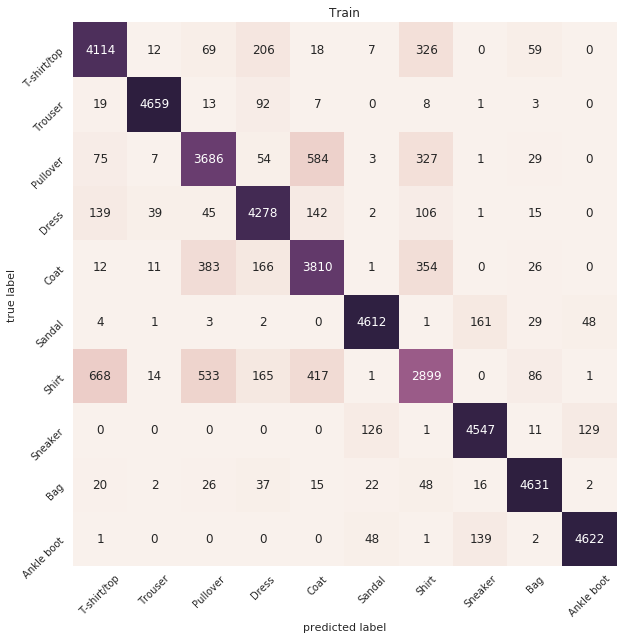

In [16]:
# For train
generate_confusion_matrix(y_training, prob_train,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


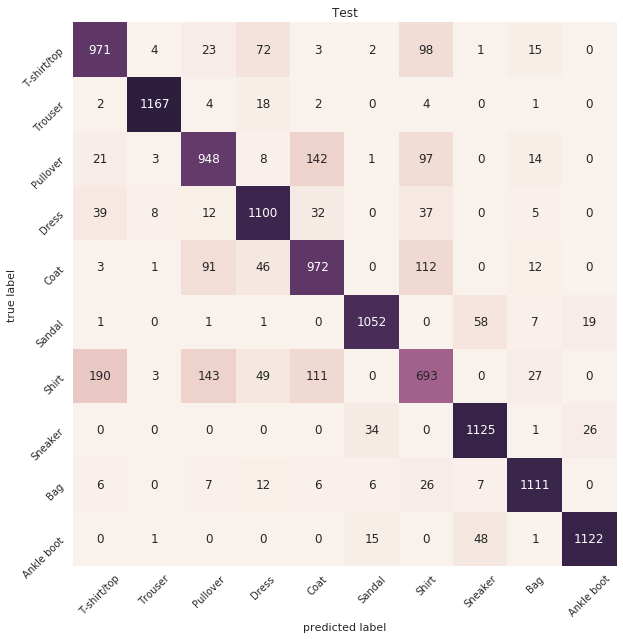

In [17]:
# For test 
generate_confusion_matrix(y_validate, prob_test,"Test")

With PCA data

In [18]:
logreg_reduced = LogisticRegression(solver = 'saga',multi_class='ovr')
logreg_reduced.fit(X_training_reduced, y_training_reduced)

# Train data
prob_train_reduced = logreg_reduced.predict(X_training_reduced)
metrics_generator(logreg_reduced,X_training_reduced,"PCA Logistic regression train",y_training_reduced,prob_train_reduced)

# Test data
prob_test_reduced = logreg_reduced.predict(X_validate_reduced)
metrics_generator(logreg_reduced,X_validate_reduced,"PCA Logistic regression test",y_validate_reduced,prob_test_reduced)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

----------------PCA Logistic regression train--------------
Score is  0.8432916666666667
             precision    recall  f1-score   support

T-shirt/top       0.79      0.84      0.81      4811
    Trouser       0.98      0.95      0.96      4802
   Pullover       0.74      0.74      0.74      4766
      Dress       0.82      0.88      0.85      4767
       Coat       0.74      0.78      0.76      4763
     Sandal       0.91      0.91      0.91      4861
      Shirt       0.67      0.54      0.60      4784
    Sneaker       0.90      0.90      0.90      4814
        Bag       0.93      0.94      0.94      4819
 Ankle boot       0.93      0.94      0.93      4813

avg / total       0.84      0.84      0.84     48000

------------------------------------------------------
----------------PCA Logistic regression test--------------
Score is  0.8345
             precision    recall  f1-score   support

T-shirt/top       0.77      0.82      0.80      1189
    Trouser       0.97      0.96  

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


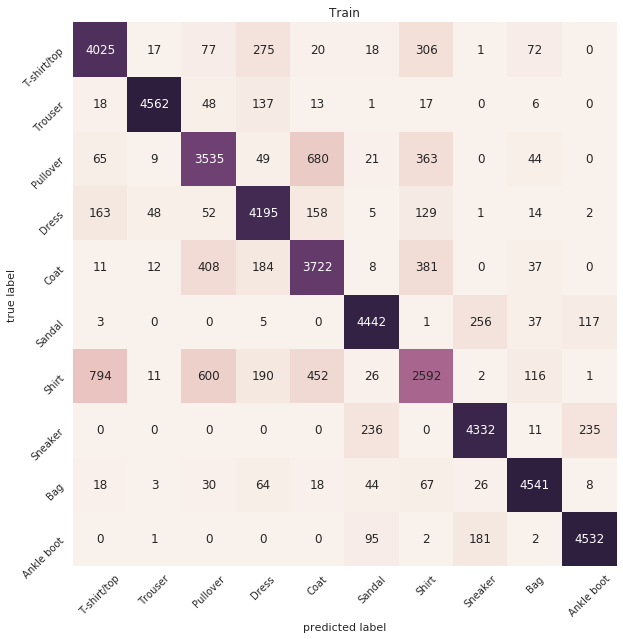

In [19]:
# For train
generate_confusion_matrix(y_training_reduced, prob_train_reduced,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


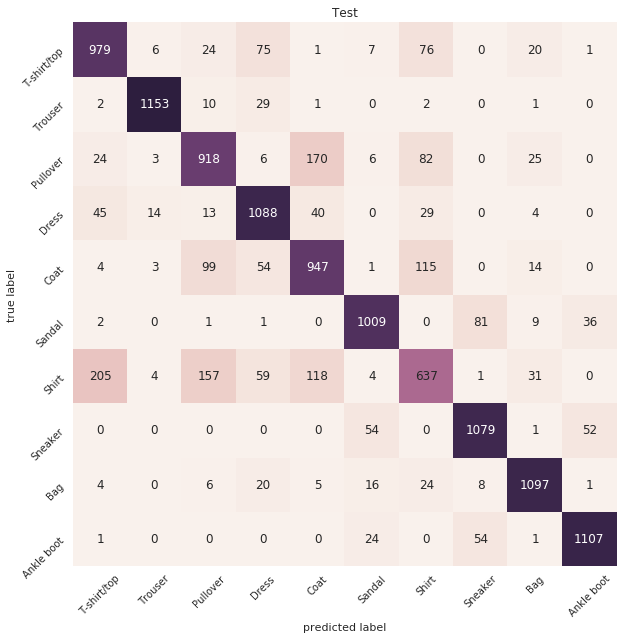

In [20]:
# For test 
generate_confusion_matrix(y_validate_reduced, prob_test_reduced,"Test")

<b>Developing a K-Nearest Neighbour classifier</b>

With Non PCA data

In [21]:
# Parameter tuning for an optimum K for KNN
def knnParameterTuning(X,y):
    # Since KNN performs worse as the size of the dataset increases 
    # we are going to tune the hyperparameter on a reduced set of data
#     X_reduced = X[0:1000]
#     y_reduced = y[0:1000]
    X_reduced = X
    y_reduced = y
    klist = [3,5,7,10,13,15,17,20,23,25,27,30]

    cv_scores = []

    # performing cross validation 
    for k in klist:
        knn_temp = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        scores = cross_val_score(knn_temp, X_reduced, y_reduced, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = klist[MSE.index(min(MSE))]
    print("The optimal number of neighbors is %d" % optimal_k)

    # plot misclassification error vs k
    plt.plot(klist, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    return optimal_k

# Calculating optimal_k for KNN
# optimal_k = knnParameterTuning(X_training,y_training)

# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.
optimal_k = 7

In [22]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn.fit(X_training,y_training)

# Train data
prob_train_knn = knn.predict(X_training)
metrics_generator(knn,X_training,"KNN train",y_training,prob_train_knn)

# Test data
prob_test_knn = knn.predict(X_validate)
metrics_generator(knn,X_validate,"KNN test",y_validate,prob_test_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

----------------KNN train--------------
Score is  0.8849791666666667
             precision    recall  f1-score   support

T-shirt/top       0.81      0.91      0.86      4811
    Trouser       0.99      0.97      0.98      4802
   Pullover       0.79      0.85      0.82      4766
      Dress       0.91      0.89      0.90      4767
       Coat       0.83      0.82      0.82      4763
     Sandal       1.00      0.86      0.92      4861
      Shirt       0.75      0.66      0.70      4784
    Sneaker       0.90      0.96      0.93      4814
        Bag       0.98      0.96      0.97      4819
 Ankle boot       0.91      0.97      0.94      4813

avg / total       0.89      0.88      0.88     48000

------------------------------------------------------
----------------KNN test--------------
Score is  0.8518333333333333
             precision    recall  f1-score   support

T-shirt/top       0.76      0.86      0.81      1189
    Trouser       0.99      0.97      0.98      1198
   Pullov

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


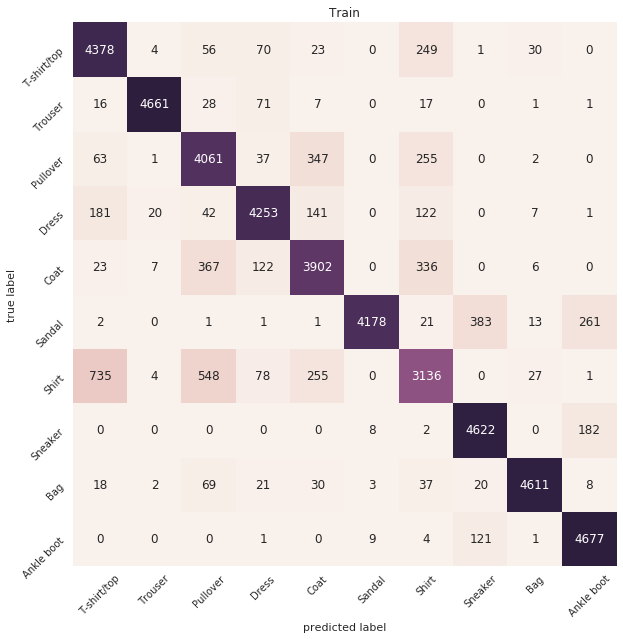

In [23]:
# For train
generate_confusion_matrix(y_training, prob_train_knn,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


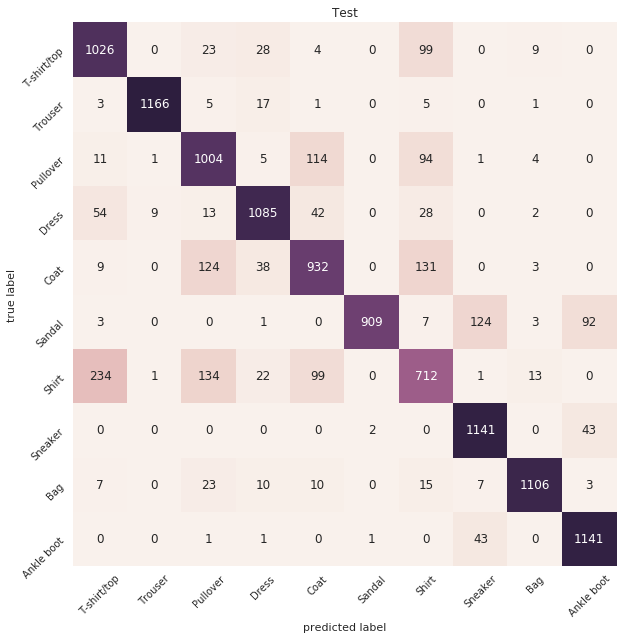

In [24]:
# For test 
generate_confusion_matrix(y_validate, prob_test_knn,"Test")

With PCA data

In [25]:
# optimal_k = knnParameterTuning(X_training_reduced,y_training_reduced)
# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.
optimal_k = 5

In [26]:
knn_reduced = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)
knn_reduced.fit(X_training_reduced,y_training_reduced)

# Train data
prob_train_knn_reduced = knn_reduced.predict(X_training_reduced)
metrics_generator(knn_reduced,X_training_reduced,"PCA KNN train",y_training_reduced,prob_train_knn_reduced)

# Test data
prob_test_knn_reduced = knn_reduced.predict(X_validate_reduced)
metrics_generator(knn_reduced,X_validate_reduced,"PCA KNN test",y_validate_reduced,prob_test_knn_reduced)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

----------------PCA KNN train--------------
Score is  0.89875
             precision    recall  f1-score   support

T-shirt/top       0.83      0.92      0.87      4811
    Trouser       0.99      0.98      0.98      4802
   Pullover       0.80      0.86      0.83      4766
      Dress       0.92      0.91      0.92      4767
       Coat       0.84      0.84      0.84      4763
     Sandal       0.99      0.89      0.94      4861
      Shirt       0.79      0.69      0.74      4784
    Sneaker       0.92      0.97      0.94      4814
        Bag       0.98      0.96      0.97      4819
 Ankle boot       0.93      0.97      0.95      4813

avg / total       0.90      0.90      0.90     48000

------------------------------------------------------
----------------PCA KNN test--------------
Score is  0.85525
             precision    recall  f1-score   support

T-shirt/top       0.76      0.87      0.81      1189
    Trouser       0.99      0.98      0.98      1198
   Pullover       0.74 

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


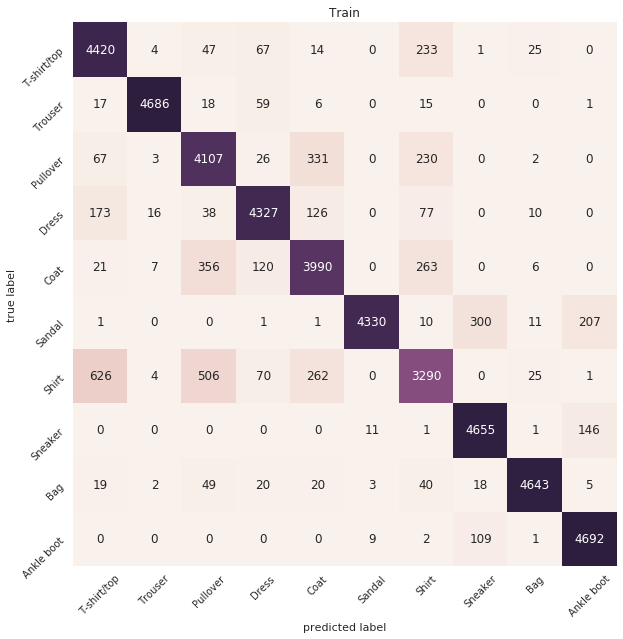

In [27]:
# For train
generate_confusion_matrix(y_training_reduced, prob_train_knn_reduced,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


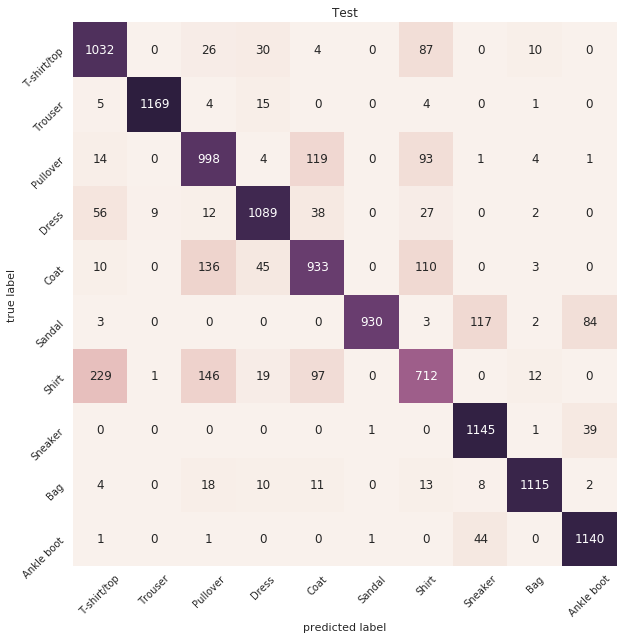

In [28]:
# For test 
generate_confusion_matrix(y_validate_reduced, prob_test_knn_reduced,"Test")

<b>Developing a Convoluted Neural Network classifier</b>

In [29]:
# Function to generate the CNN model
def getCNNModel(learning_rate=0.001):
    model = Sequential()
    inputShape = (28, 28, 1)

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
   
    opt = Adam(lr=learning_rate)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model


# HyperParmeter search space for grid search
epochs = [30, 60]
learning_rates = [0.01, 0.001]
batches = [128, 256]

# Create hyperparameter dictionary
hyperparameters = dict(epochs=epochs, batch_size=batches, learning_rate=learning_rates)

# Defining default rates
best_result = {
    'learning_rate': 0.001,
    'batch_size': 256,
    'epochs': 60
}

In [30]:
# Reshape the data
trainX = X_training.reshape((X_training.shape[0], 28, 28, 1))
validateX = X_validate.reshape((X_validate.shape[0], 28, 28, 1))

# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(y_training, len(labels))
validateY = np_utils.to_categorical(y_validate, len(labels))

In [31]:
# # Wrapping Keras model for sklearn modules
# cnn_sklearn = KerasClassifier(build_fn=getCNNModel, verbose=0)

# # Performing Grid Search
# grid = GridSearchCV(estimator=cnn_sklearn, param_grid=hyperparameters, n_jobs=-1, scoring="accuracy")

# # Fit grid search
# grid_result = grid.fit(trainX, y_training)

# # Hyperparameters of best neural network
# best_result = grid_result.best_params_

# print("Best parameters are: ", best_result)

# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.

In [32]:
# Get CNN model
cnn = getCNNModel(best_result['learning_rate'])

# Train the CNN
cnn.fit(trainX, trainY,validation_data=(validateX, validateY),batch_size=best_result['batch_size'], epochs=best_result['epochs'])

# Train data
prob_train_cnn = cnn.predict_classes(trainX)
metrics_generator(cnn,trainX,"CNN train",y_training,prob_train_cnn,True,trainY)

# Test data
prob_test_cnn = cnn.predict_classes(validateX)
metrics_generator(cnn,validateX,"CNN test",y_validate,prob_test_cnn,True,validateY)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 118s 2ms/step - loss: 0.8324 - acc: 0.6841 - val_loss: 0.5401 - val_acc: 0.8018
Epoch 2/60
48000/48000 [==============================] - 115s 2ms/step - loss: 0.5202 - acc: 0.8043 - val_loss: 0.4393 - val_acc: 0.8363
Epoch 3/60
48000/48000 [==============================] - 114s 2ms/step - loss: 0.4508 - acc: 0.8341 - val_loss: 0.3801 - val_acc: 0.8577
Epoch 4/60
48000/48000 [==============================] - 114s 2ms/step - loss: 0.4076 - acc: 0.8515 - val_loss: 0.3451 - val_acc: 0.8766
Epoch 5/60
48000/48000 [==============================] - 114s 2ms/step - loss: 0.3739 - acc: 0.8635 - val_loss: 0.3172 - val_acc: 0.8825
Epoch 6/60
48000/48000 [==============================] - 113s 2ms/step - loss: 0.3501 - acc: 0.8733 - val_loss: 0.3024 - val_acc: 0.8893
Epoch 7/60
48000/48000 [==============================] - 113s 2ms/step - loss: 0.3366 - acc: 0.8765 - val_loss: 0.2898 - 

48000/48000 [==============================] - 113s 2ms/step - loss: 0.1485 - acc: 0.9422 - val_loss: 0.2140 - val_acc: 0.9272
Epoch 60/60
48000/48000 [==============================] - 114s 2ms/step - loss: 0.1532 - acc: 0.9420 - val_loss: 0.2170 - val_acc: 0.9264


----------------CNN train--------------
48000/48000 [==============================] - 30s 624us/step
Score is  0.972625
             precision    recall  f1-score   support

T-shirt/top       0.94      0.96      0.95      4811
    Trouser       1.00      1.00      1.00      4802
   Pullover       0.97      0.93      0.95      4766
      Dress       0.98      0.98      0.98      4767
       Coat       0.93      0.97      0.95      4763
     Sandal       1.00      1.00      1.00      4861
      Shirt       0.92      0.91      0.91      4784
    Sneaker       0.98      1.00      0.99      4814
        Bag       1.00      1.00      1.00      4819
 Ankle boot       1.00      0.98      0.99      4813

avg / total       0.97      0.97      0.97     48000

------------------------------------------------------
----------------CNN test--------------
12000/12000 [==============================] - 8s 625us/step
Score is  0.9264166666666667
             precision    recall  f1-score   support

T-

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


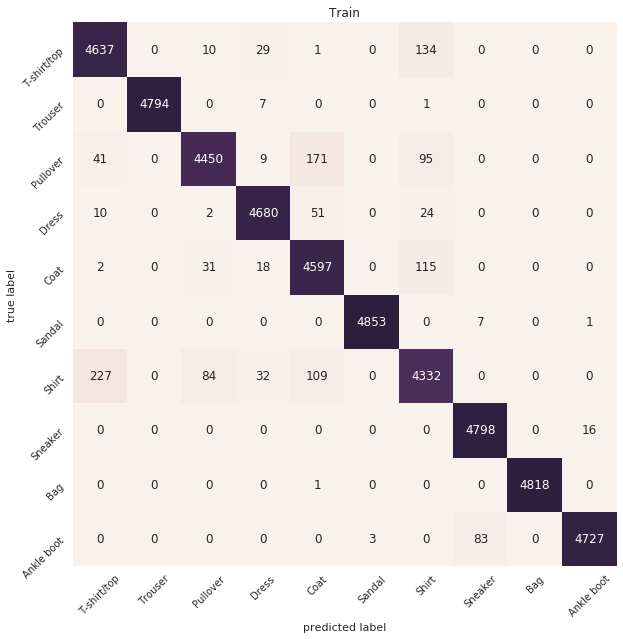

In [33]:
# For train
generate_confusion_matrix(y_training, prob_train_cnn,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


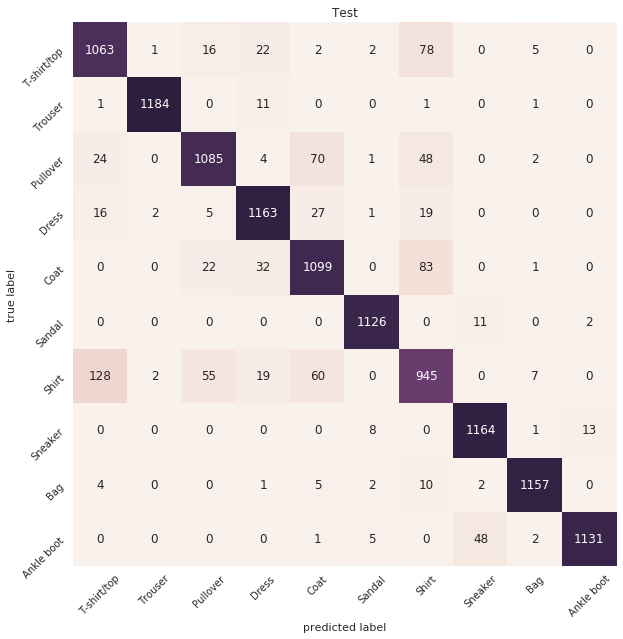

In [34]:
# For test 
generate_confusion_matrix(y_validate, prob_test_cnn,"Test")

<b>Developing a Random Forest classifier</b>

With Non PCA data

In [35]:
# HyperParmeter search space for grid search
estimators = [50, 100, 150]
depth = [20, 50 ,70]

# Create hyperparameter dictionary
hyperparameters = dict(n_estimators=estimators, max_depth=depth)

# Defining default rates
# best_result = {
#     'n_estimators': 100,
#     'max_depth': 50
# }
# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.
best_result = {
    'n_estimators': 150,
    'max_depth': 70
}

In [36]:
# rfc = RandomForestClassifier()

# # Performing Grid Search
# grid = GridSearchCV(estimator=rfc, param_grid=hyperparameters, n_jobs=-1, scoring="accuracy")

# # Fit grid search
# grid_result = grid.fit(X_training, y_training)

# # Hyperparameters of best neural network
# best_result = grid_result.best_params_

# print("Best parameters are: ", best_result)

# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.

In [37]:
# Create RN
rnd_clf = RandomForestClassifier(n_estimators=best_result['n_estimators'], max_depth=best_result['max_depth'])

# Train the RN
rnd_clf.fit(X_training, y_training)

# Train data
prob_train_rf = rnd_clf.predict(X_training)
metrics_generator(rnd_clf,X_training,"RF train",y_training,prob_train_rf)

# Test data
prob_test_rf = rnd_clf.predict(X_validate)
metrics_generator(rnd_clf,X_validate,"RF test",y_validate,prob_test_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----------------RF train--------------
Score is  1.0
             precision    recall  f1-score   support

T-shirt/top       1.00      1.00      1.00      4811
    Trouser       1.00      1.00      1.00      4802
   Pullover       1.00      1.00      1.00      4766
      Dress       1.00      1.00      1.00      4767
       Coat       1.00      1.00      1.00      4763
     Sandal       1.00      1.00      1.00      4861
      Shirt       1.00      1.00      1.00      4784
    Sneaker       1.00      1.00      1.00      4814
        Bag       1.00      1.00      1.00      4819
 Ankle boot       1.00      1.00      1.00      4813

avg / total       1.00      1.00      1.00     48000

------------------------------------------------------
----------------RF test--------------
Score is  0.8805833333333334
             precision    recall  f1-score   support

T-shirt/top       0.81      0.86      0.83      1189
    Trouser       1.00      0.97      0.98      1198
   Pullover       0.79    

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


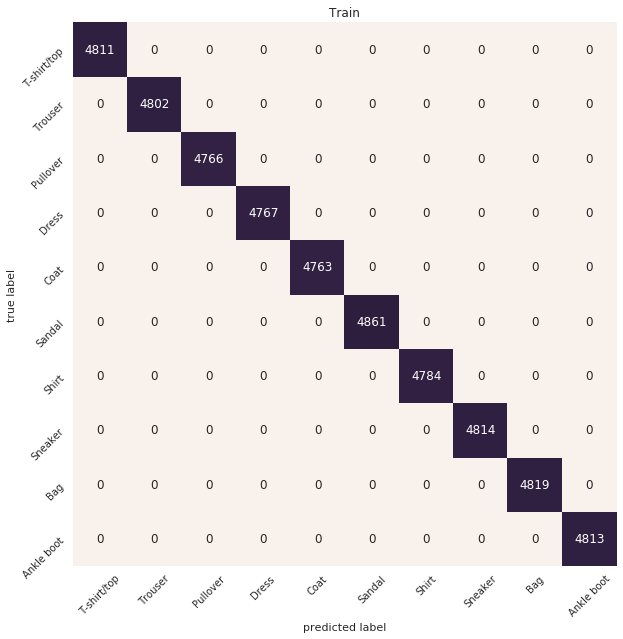

In [38]:
# For train
generate_confusion_matrix(y_training, prob_train_rf,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


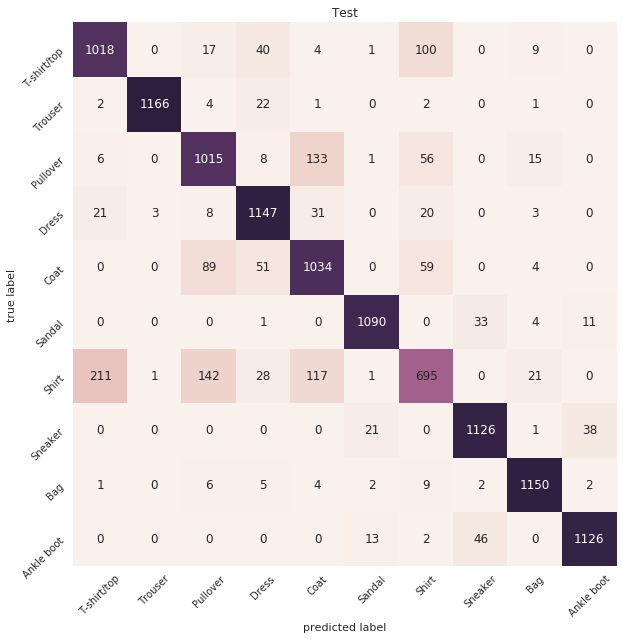

In [39]:
# For test 
generate_confusion_matrix(y_validate, prob_test_rf,"Test")

With PCA Data

In [40]:
# rfc = RandomForestClassifier()

# # Performing Grid Search
# grid = GridSearchCV(estimator=rfc, param_grid=hyperparameters, n_jobs=-1, scoring="accuracy")

# # Fit grid search
# grid_result = grid.fit(X_training_reduced, y_training_reduced)

# # Hyperparameters of best neural network
# best_result = grid_result.best_params_

# print("Best parameters are: ", best_result)

# Since parameter tuning is a time consuming process, this has been done on my local system. Using values from that run as parameters in cloud.
best_result = {
    'n_estimators': 150,
    'max_depth': 50
}

In [41]:
# Create RN
rnd_clf_reduced = RandomForestClassifier(n_estimators=best_result['n_estimators'], max_depth=best_result['max_depth'])

# Train the RN
rnd_clf_reduced.fit(X_training_reduced, y_training_reduced)

# Train data
prob_train_rf_reduced = rnd_clf_reduced.predict(X_training_reduced)
metrics_generator(rnd_clf_reduced,X_training_reduced,"PCA RF train",y_training,prob_train_rf_reduced)

# Test data
prob_test_rf_reduced = rnd_clf_reduced.predict(X_validate_reduced)
metrics_generator(rnd_clf_reduced,X_validate_reduced,"PCA RF test",y_validate,prob_test_rf_reduced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----------------PCA RF train--------------
Score is  1.0
             precision    recall  f1-score   support

T-shirt/top       1.00      1.00      1.00      4811
    Trouser       1.00      1.00      1.00      4802
   Pullover       1.00      1.00      1.00      4766
      Dress       1.00      1.00      1.00      4767
       Coat       1.00      1.00      1.00      4763
     Sandal       1.00      1.00      1.00      4861
      Shirt       1.00      1.00      1.00      4784
    Sneaker       1.00      1.00      1.00      4814
        Bag       1.00      1.00      1.00      4819
 Ankle boot       1.00      1.00      1.00      4813

avg / total       1.00      1.00      1.00     48000

------------------------------------------------------
----------------PCA RF test--------------
Score is  0.8525833333333334
             precision    recall  f1-score   support

T-shirt/top       0.77      0.84      0.80      1189
    Trouser       1.00      0.96      0.98      1198
   Pullover       

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


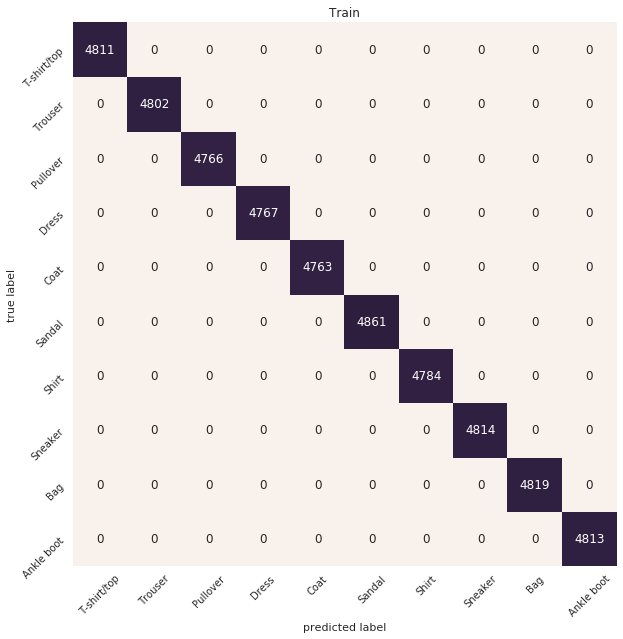

In [42]:
# For train
generate_confusion_matrix(y_training_reduced, prob_train_rf_reduced,"Train")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


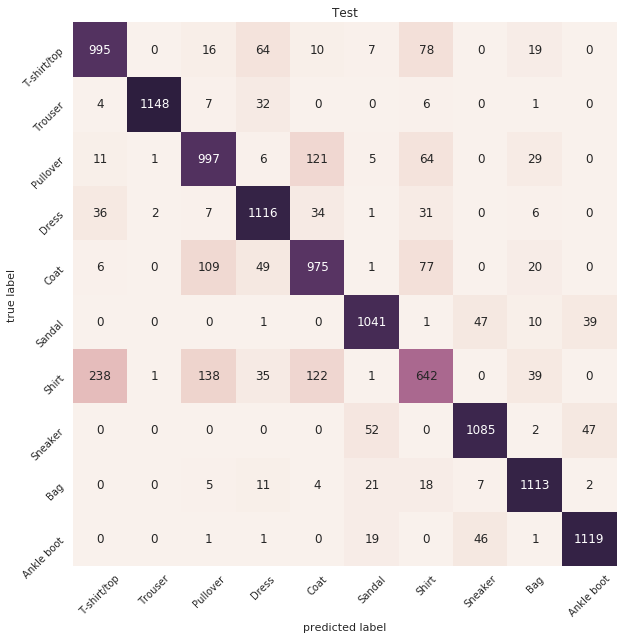

In [43]:
# For test 
generate_confusion_matrix(y_validate_reduced, prob_test_rf_reduced,"Test")

<b>Testing all generated model against the Test data set and comparing their performance.</b>

1. Logistic Regression without PCA.
2. Logistic Regression with PCA.
3. KNN without PCA(Hyperparameter tuned).
4. KNN with PCA(Hyperparameter tuned).
5. 3 layer CNN(Hyperparameter tuned using Grid Search).
6. Random Forest without PCA(Hyperparameter tuned using Grid Search).
7. Random Forest with PCA(Hyperparameter tuned using Grid Search).

Logistic Regression without PCA

In [44]:
prob_final = logreg.predict(X_test)
metrics_generator(logreg,X_test,"Logistic regression final",y_test,prob_final)

----------------Logistic regression final--------------
Score is  0.8531
             precision    recall  f1-score   support

T-shirt/top       0.78      0.82      0.80      1000
    Trouser       0.96      0.97      0.97      1000
   Pullover       0.78      0.77      0.77      1000
      Dress       0.86      0.88      0.87      1000
       Coat       0.78      0.80      0.79      1000
     Sandal       0.93      0.92      0.92      1000
      Shirt       0.65      0.57      0.61      1000
    Sneaker       0.90      0.91      0.91      1000
        Bag       0.93      0.94      0.94      1000
 Ankle boot       0.94      0.94      0.94      1000

avg / total       0.85      0.85      0.85     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


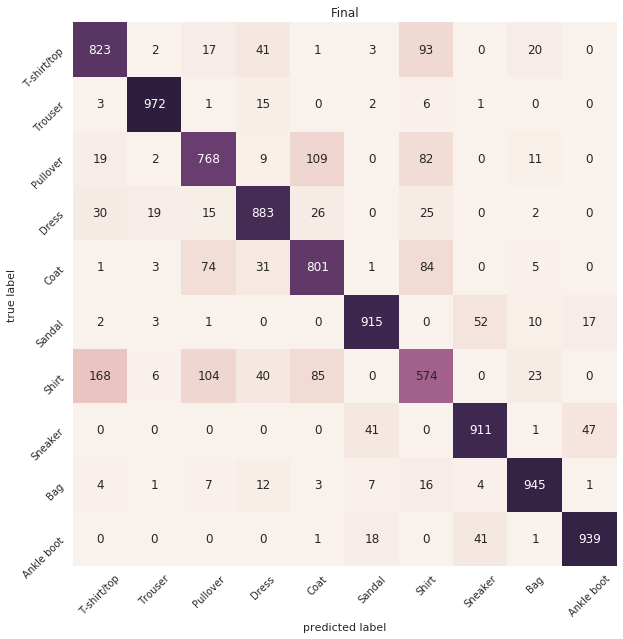

In [45]:
# For train
generate_confusion_matrix(y_test, prob_final,"Final")

Logistic Regression with PCA

In [46]:
# Test data
prob_final_reduced = logreg_reduced.predict(X_test_reduced)
metrics_generator(logreg_reduced,X_test_reduced,"PCA Logistic regression final",y_test,prob_final_reduced)

----------------PCA Logistic regression final--------------
Score is  0.8436
             precision    recall  f1-score   support

T-shirt/top       0.79      0.81      0.80      1000
    Trouser       0.97      0.96      0.97      1000
   Pullover       0.77      0.76      0.77      1000
      Dress       0.83      0.89      0.86      1000
       Coat       0.77      0.81      0.79      1000
     Sandal       0.90      0.90      0.90      1000
      Shirt       0.68      0.56      0.61      1000
    Sneaker       0.88      0.88      0.88      1000
        Bag       0.92      0.94      0.93      1000
 Ankle boot       0.90      0.92      0.91      1000

avg / total       0.84      0.84      0.84     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


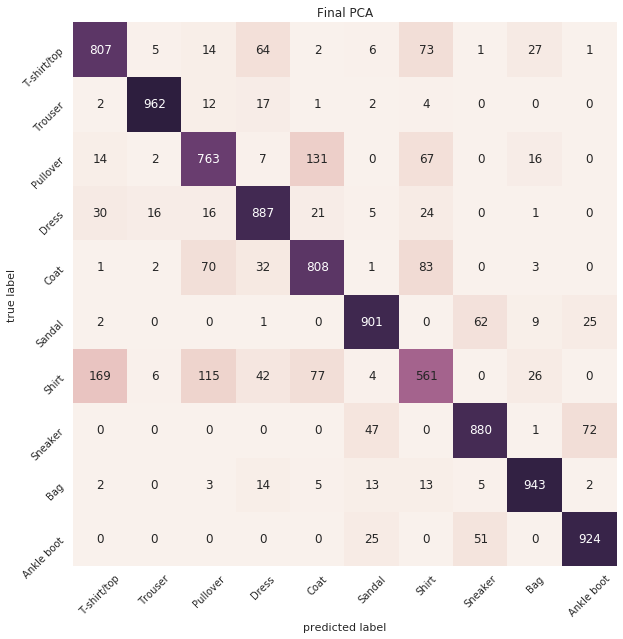

In [47]:
# For final
generate_confusion_matrix(y_test, prob_final_reduced,"Final PCA")

KNN without PCA(Hyperparameter tuned)

In [48]:
# Test data
prob_final_knn = knn.predict(X_test)
metrics_generator(knn,X_test,"KNN final",y_test,prob_final_knn)

----------------KNN final--------------
Score is  0.8545
             precision    recall  f1-score   support

T-shirt/top       0.76      0.87      0.81      1000
    Trouser       0.99      0.96      0.98      1000
   Pullover       0.75      0.80      0.77      1000
      Dress       0.91      0.88      0.89      1000
       Coat       0.79      0.79      0.79      1000
     Sandal       0.99      0.80      0.88      1000
      Shirt       0.66      0.58      0.62      1000
    Sneaker       0.86      0.94      0.90      1000
        Bag       0.97      0.95      0.96      1000
 Ankle boot       0.88      0.97      0.92      1000

avg / total       0.86      0.85      0.85     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


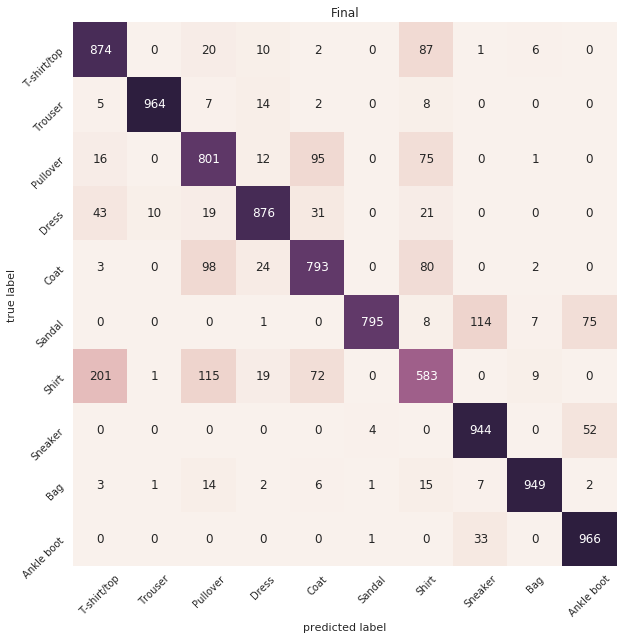

In [49]:
# For final
generate_confusion_matrix(y_test, prob_final_knn,"Final")

KNN with PCA(Hyperparameter tuned)

In [50]:
# Test data
prob_final_knn_reduced = knn_reduced.predict(X_test_reduced)
metrics_generator(knn_reduced,X_test_reduced,"PCA KNN final",y_test,prob_final_knn_reduced)

----------------PCA KNN final--------------
Score is  0.8582
             precision    recall  f1-score   support

T-shirt/top       0.77      0.86      0.81      1000
    Trouser       0.99      0.96      0.97      1000
   Pullover       0.76      0.82      0.79      1000
      Dress       0.91      0.88      0.89      1000
       Coat       0.80      0.80      0.80      1000
     Sandal       0.99      0.82      0.90      1000
      Shirt       0.66      0.58      0.62      1000
    Sneaker       0.87      0.94      0.90      1000
        Bag       0.98      0.95      0.96      1000
 Ankle boot       0.89      0.96      0.92      1000

avg / total       0.86      0.86      0.86     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


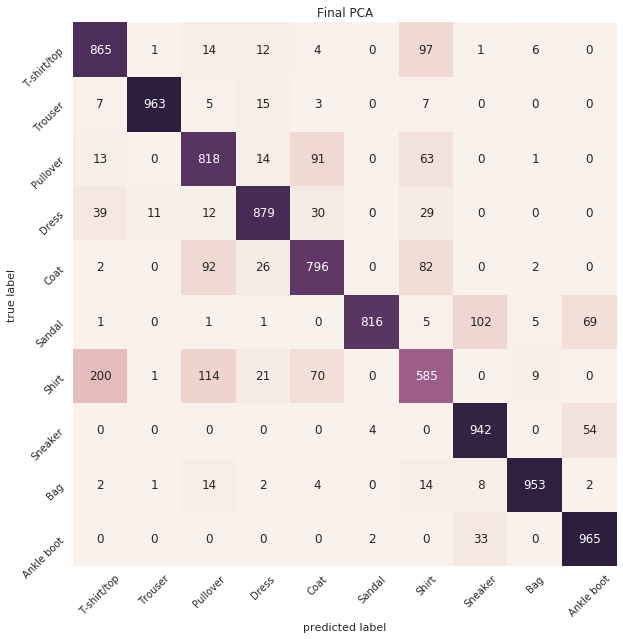

In [51]:
# For final
generate_confusion_matrix(y_test, prob_final_knn_reduced,"Final PCA")

3 layer CNN(Hyperparameter tuned using Grid Search)

In [52]:
# Reshape the data
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one-hot encode the training and testing labels
testY = np_utils.to_categorical(y_test, len(labels))

# Test data
prob_final_cnn = cnn.predict_classes(testX)
metrics_generator(cnn,testX,"CNN final",y_test,prob_final_cnn,True,testY)

----------------CNN final--------------
10000/10000 [==============================] - 6s 626us/step
Score is  0.9276
             precision    recall  f1-score   support

T-shirt/top       0.86      0.91      0.88      1000
    Trouser       0.99      0.99      0.99      1000
   Pullover       0.93      0.85      0.89      1000
      Dress       0.93      0.94      0.93      1000
       Coat       0.87      0.90      0.88      1000
     Sandal       0.99      0.98      0.99      1000
      Shirt       0.80      0.79      0.79      1000
    Sneaker       0.96      0.97      0.96      1000
        Bag       0.99      0.99      0.99      1000
 Ankle boot       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


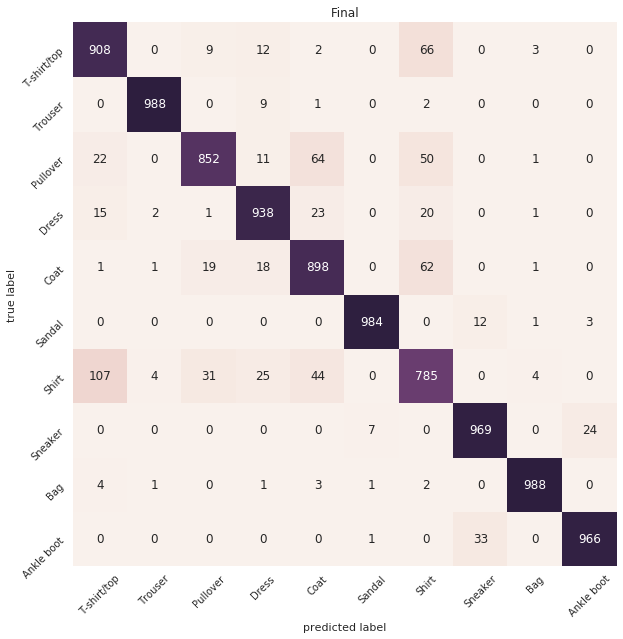

In [53]:
# For final
generate_confusion_matrix(y_test, prob_final_cnn,"Final")

Random Forest without PCA(Hyperparameter tuned using Grid Search)

In [54]:
# Test data
prob_final_rf = rnd_clf.predict(X_test)
metrics_generator(rnd_clf,X_test,"RF final",y_test,prob_final_rf)

----------------RF final--------------
Score is  0.8821
             precision    recall  f1-score   support

T-shirt/top       0.81      0.86      0.83      1000
    Trouser       0.99      0.97      0.98      1000
   Pullover       0.80      0.81      0.80      1000
      Dress       0.88      0.93      0.90      1000
       Coat       0.80      0.85      0.83      1000
     Sandal       0.97      0.94      0.96      1000
      Shirt       0.74      0.60      0.66      1000
    Sneaker       0.92      0.93      0.93      1000
        Bag       0.95      0.98      0.96      1000
 Ankle boot       0.93      0.95      0.94      1000

avg / total       0.88      0.88      0.88     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


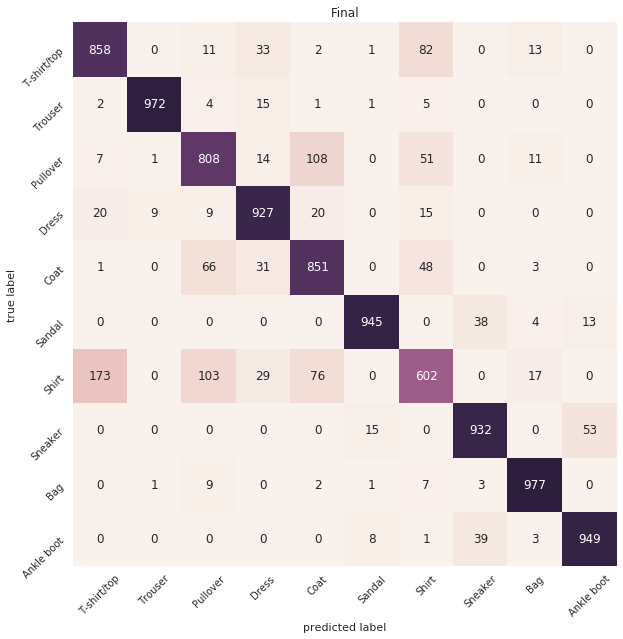

In [55]:
# For final
generate_confusion_matrix(y_test, prob_final_rf,"Final")

Random Forest with PCA(Hyperparameter tuned using Grid Search)

In [56]:
# Test data
prob_final_rf_reduced = rnd_clf_reduced.predict(X_test_reduced)
metrics_generator(rnd_clf_reduced,X_test_reduced,"PCA RF final",y_test,prob_final_rf_reduced)

----------------PCA RF final--------------
Score is  0.8547
             precision    recall  f1-score   support

T-shirt/top       0.76      0.84      0.80      1000
    Trouser       0.99      0.95      0.97      1000
   Pullover       0.78      0.80      0.79      1000
      Dress       0.87      0.89      0.88      1000
       Coat       0.78      0.83      0.80      1000
     Sandal       0.92      0.91      0.91      1000
      Shirt       0.72      0.54      0.61      1000
    Sneaker       0.90      0.88      0.89      1000
        Bag       0.92      0.96      0.94      1000
 Ankle boot       0.90      0.94      0.92      1000

avg / total       0.85      0.85      0.85     10000

------------------------------------------------------


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


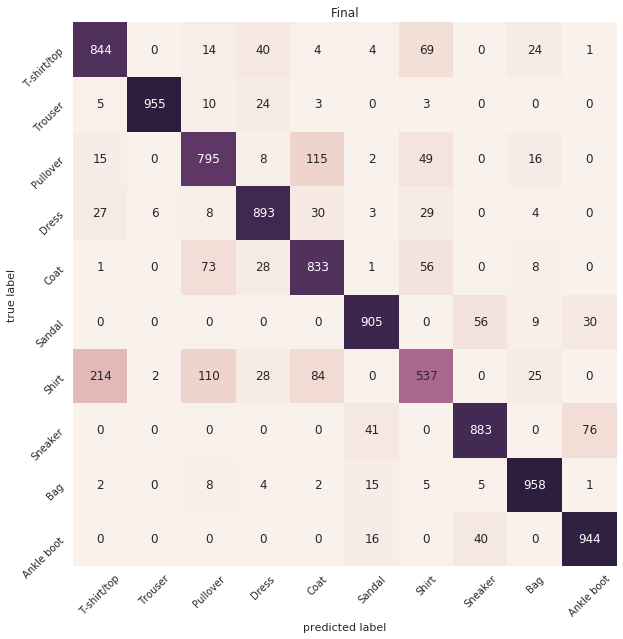

In [57]:
# For final
generate_confusion_matrix(y_test, prob_final_rf_reduced,"Final")

References:

1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
3. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
4. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#parameter-tuning-with-cross-validation
5. https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
6. https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
7. https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/